In [187]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn import ensemble

In [188]:
#Create Dataframe from a csv file

house_df=pd.read_csv("Cumming_GA_PropertiesList.csv")
house_df['Zip code']=house_df['Zip code'].fillna(0).astype(np.int64)
house_df['No.of Bedrooms']=house_df['No.of Bedrooms'].fillna(0).astype(np.int64)
house_df['No.of Bathrooms']=house_df['No.of Bathrooms'].fillna(0).astype(np.int64)
#Dropping Address column
house_df=house_df.drop(['Address'],axis=1)

In [189]:
#Identify Outliers and remove them
print("The count of instances before removing outliers")
print(house_df.shape)

#Finding the outlier
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1

#Identifying lower and upper bound outliers for attributes
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

#Removing the outlier

house_dfout = house_df[~((house_df < (Q1 - 1.5 * IQR)) |(house_df > (Q3 + 1.5 * IQR))).any(axis=1)]

#print the shape after removing outliers
print("The count of instances after removing outliers")
print(house_dfout.shape)

The count of instances before removing outliers
(387, 9)
The count of instances after removing outliers
(270, 9)


In [190]:
#Imputing Missing Values
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(house_dfout)
imputed_train_df = imp_mean.transform(house_dfout)

imputeddf=pd.DataFrame(imputed_train_df)
imputeddf.columns=['Zipcode','Price','No_of_Bedrooms','No_of_Bathrooms','Sq_ft','HouseType','Basementtype','Lot_Size(Acres)','Year_Built']

imputeddf['Year_Built']=imputeddf['Year_Built'].astype(np.int64)

In [191]:
#Converting Price type to float to fit into transformations
imputeddf['Price'] = imputeddf['Price'].astype(float)

In [192]:
#Data transformation (Normalization)

#Change string values to numerical using label encoder 
#Need to do this for fit

le = preprocessing.LabelEncoder()
le.fit(imputeddf['HouseType'])
imputeddf['HouseType']=le.transform(imputeddf['HouseType'])

le.fit(imputeddf['Basementtype'])
imputeddf['Basementtype']=le.transform(imputeddf['Basementtype'])

In [193]:
#Normalization

independent_variables=imputeddf.columns
independent_variables=independent_variables.delete(1)
data=imputeddf[independent_variables]
Y=imputeddf['Price']

scaler = MinMaxScaler()
Xnorm = scaler.fit_transform(data)

In [194]:
#Create dataframe with normalized data

NormalizedDF=pd.DataFrame(Xnorm)
NormalizedDF.columns=independent_variables
X=NormalizedDF.copy()
abt=NormalizedDF.copy()
abt['price']=np.log2(imputeddf['Price'])
abt.to_csv('Subramanian_pp.csv',index=False,header=True)

In [195]:
#log transform target variable to fit into transformations

y = np.log2(imputeddf['Price'])


In [196]:
#Feature Selection (Sequential Forward Selection) - Wrapper Method (Bonus Points Question - Both the methods are shown in PreProcessing file)

LR=LinearRegression()
sfs1=sfs(LR,k_features=8,forward=True,floating=False,scoring='r2',verbose=2,cv=5)
sfs1=sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2020-04-26 21:55:50] Features: 1/8 -- score: 0.5493225896345983[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2020-04-26 21:55:50] Features: 2/8 -- score: 0.5611482605385546[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2020-04-26 21:55:50] Features: 3/8 -- score: 0.5679641027434974[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [197]:
#Selecting top 8 features
feat_cols=list(sfs1.k_feature_idx_)
print(feat_cols) #Selected Features - Zipcode,No_of_Bedrooms,No_of_Bathrooms,Sq_ft,HouseType,Basementtype,Lot_Size(Acres)

feat_cols=[]
#Feature with less score - Year_Built

[0, 1, 2, 3, 4, 5, 6, 7]


Feature Selection - Since I have less features in the dataset, I preferred to use all the features (Implemented this question for bonus point)

In [198]:
#Spliting train set as 80% and test set as 20%
#y=imputeddf['Price']
#imputeddf=imputeddf.drop('Price',axis=1)
#X=imputeddf
X=NormalizedDF.copy()
y = np.log2(imputeddf['Price'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [199]:
X_train.head()

,Zipcode,No_of_Bedrooms,No_of_Bathrooms,Sq_ft,HouseType,Basementtype,Lot_Size(Acres),Year_Built
244,1.0,0.6,0.666667,0.790050,0.000000,0.000000,0.085714,0.804878
227,1.0,0.2,0.333333,0.197358,0.000000,0.000000,0.561905,0.414634
166,1.0,0.6,0.666667,0.885632,0.333333,0.666667,0.238095,0.682927
78,1.0,0.2,0.333333,0.209538,0.333333,0.666667,0.047619,0.585366
241,1.0,0.2,0.000000,0.066474,0.333333,0.666667,0.304762,0.146341


In [200]:
y_train.head()

244    18.662752
227    17.960138
166    19.069072
78     17.631120
241    17.565697
Name: Price, dtype: float64

In [201]:
#Simple Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
coeff_df=pd.DataFrame(linreg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Zipcode,0.085588
No_of_Bedrooms,-0.289129
No_of_Bathrooms,0.359154
Sq_ft,1.256709
HouseType,-0.135273
Basementtype,0.176533
Lot_Size(Acres),0.268087
Year_Built,0.299701


In [203]:
predictions_linear=linreg.predict(X_test)
expected=y_test

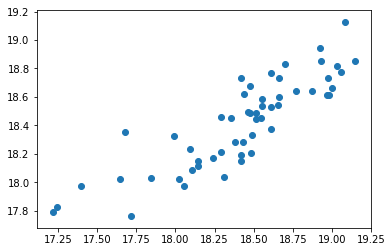

In [204]:
plt.scatter(y_test,predictions_linear)

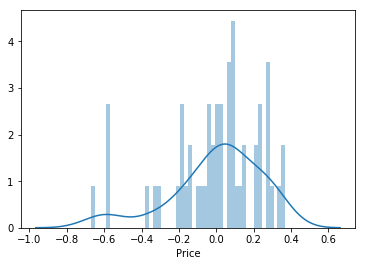

In [205]:
sns.distplot((y_test-predictions_linear),bins=50)

In [207]:
mse = mean_squared_error(y_test, predictions_linear)
root_mean_square_error_linear = np.sqrt(mse)
print("RMSE for liner regression>>>",root_mean_square_error_linear)

RMSE for liner regression>>> 0.24292026563122815


In [208]:
#DecisionTree - Information based learning

decisionmodel = DecisionTreeRegressor(random_state=10)

In [209]:
decisionmodel.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [210]:
predictions_decision=decisionmodel.predict(X_test)

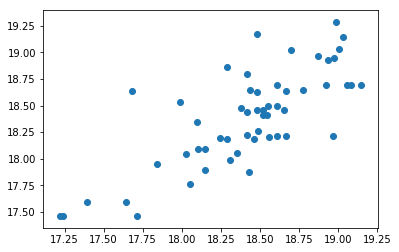

In [211]:
plt.scatter(y_test,predictions_decision)

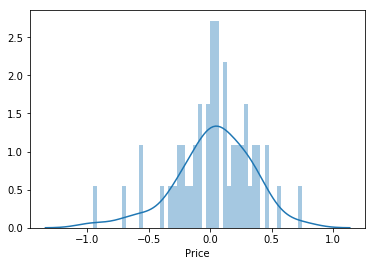

In [212]:
sns.distplot((y_test-predictions_decision),bins=50)

In [213]:
error = mean_squared_error(y_test, predictions_decision)
root_mean_square_error_decision = np.sqrt(error)
print("RMSE for Decision Tree regression>>>",root_mean_square_error_decision)


RMSE for Decision Tree regression>>> 0.312772751128698


In [214]:
#Random Forest

randommodel=RandomForestRegressor(n_estimators=10,n_jobs=-1,oob_score=True,min_samples_leaf=2,max_features=0.5)

In [215]:
randommodel.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [216]:
predictions_random=randommodel.predict(X_test)

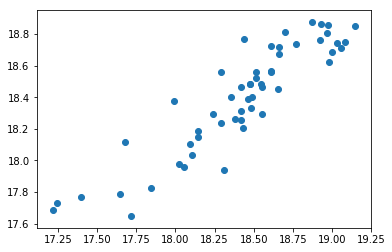

In [217]:
plt.scatter(y_test,predictions_random)

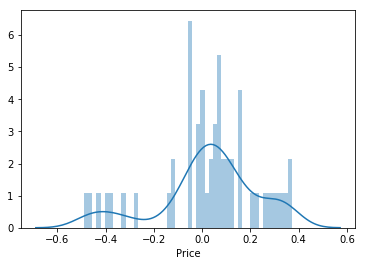

In [218]:
sns.distplot((y_test-predictions_random),bins=50)

In [219]:
error = mean_squared_error(y_test, predictions_random)
root_mean_square_error_random = np.sqrt(error)
print("RMSE for Random Forest regression>>>",root_mean_square_error_random)


RMSE for Random Forest regression>>> 0.20662985308225568


In [220]:
#KNN - Similarity based learning

knnmodel = KNeighborsRegressor(n_neighbors=4)

In [221]:
knnmodel.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [222]:
predictions_knn=knnmodel.predict(X_test)

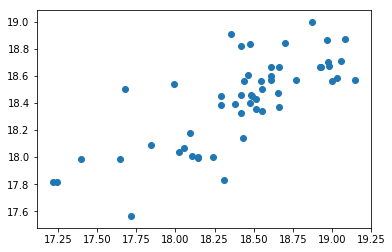

In [223]:
plt.scatter(y_test,predictions_knn)

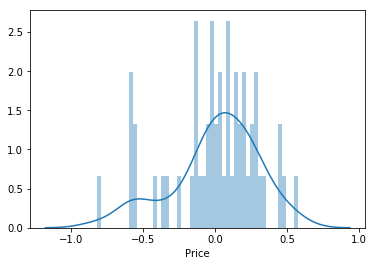

In [224]:
sns.distplot((y_test-predictions_knn),bins=50)

In [225]:
error = mean_squared_error(y_test, predictions_knn)
root_mean_square_error_knn = np.sqrt(error)
print("RMSE for KNN regression>>>",root_mean_square_error_knn)

RMSE for KNN regression>>> 0.29898730412563934


In [226]:
#Gradient Boosting Regressor
gradientmodel=GradientBoostingRegressor()

In [227]:
gradientmodel.fit(X_train, y_train)

predictions_gradient = gradientmodel.predict(X_test)
expected = y_test

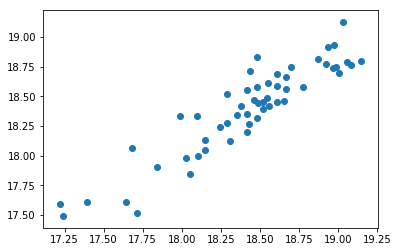

In [228]:
plt.scatter(y_test,predictions_gradient)

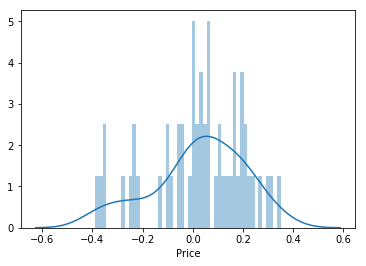

In [229]:
sns.distplot((y_test-predictions_gradient),bins=50)

In [230]:
error = mean_squared_error(y_test, predictions_gradient)
root_mean_square_error_gradient = np.sqrt(error)
print("RMSE for gradient regression>>>",root_mean_square_error_gradient)

RMSE for gradient regression>>> 0.18251455300086955


In [231]:
 #Decision Tree Regressor with GridSearchCV (Bonus Point)
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [232]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [233]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

final_prediction = reg.predict(X_test)

msedcv = mean_squared_error(y_test, final_prediction)
root_mean_square_error_decisioncv = np.sqrt(msedcv)
print("RMSE for Decision Tree regression with gridsearchCV>>>",root_mean_square_error_decisioncv)


Parameter 'max_depth' is 2 for the optimal model.
RMSE for Decision Tree regression with gridsearchCV>>> 0.2577973824247206


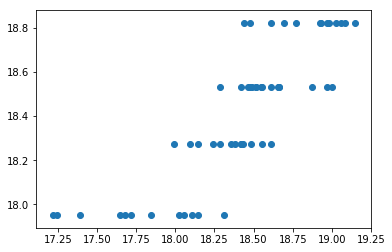

In [234]:
#Decision tree with GridSearchCV
plt.scatter(y_test,final_prediction)

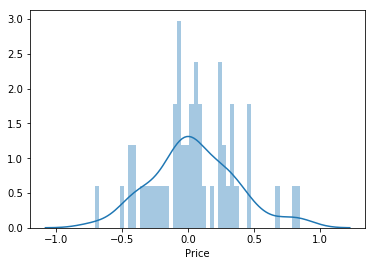

In [184]:
sns.distplot((y_test-final_prediction),bins=50)

In [185]:
#Dataframe to store RMSE for the models
modelsdf=pd.DataFrame(columns=['Model','RMSE'])
modelsdf['Model']=['Linear Regression','Decision Tree','Random Forest','Knn','Gradient Boosting','Decision Tree with GridSearchCV']
modelsdf['RMSE']=[root_mean_square_error_linear,root_mean_square_error_decision,root_mean_square_error_random,root_mean_square_error_knn,root_mean_square_error_gradient,root_mean_square_error_decisioncv]

In [186]:
#Display and compare the evaluation metric of models
modelsdf

,Model,RMSE
0,Linear Regression,0.310602
1,Decision Tree,0.361142
2,Random Forest,0.291259
3,Knn,0.312007
4,Gradient Boosting,0.296819
5,Decision Tree with GridSearchCV,0.319911
